In [2]:
import pandas as pd
import yfinance as yf

In [3]:
start = '2021-01-01'
end = '2021-10-31'
data = yf.download('CL=F PTTEP.BK OR.BK PTTGC.BK PTT.BK', start=start, end=end)


[*********************100%***********************]  5 of 5 completed


In [4]:
data = yf.download('CL=F PTTEP.BK OR.BK PTTGC.BK PTT.BK', start=start, end=end)


[*********************100%***********************]  5 of 5 completed


In [71]:
df=data.Close

In [72]:
df = df.fillna(method='ffill')
df = df.pct_change()
df = df.dropna()
df = df[['CL=F','OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']]

In [73]:
df[df['CL=F'] == 0]
#check 0.0 CL=F

,CL=F,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2021-02-15,0.0,0.162393,0.031390,0.011858,0.024845
2021-04-02,0.0,0.000000,0.013100,-0.007905,-0.006135
2021-05-31,0.0,-0.008264,0.008511,0.003968,0.006369
2021-07-05,0.0,-0.008333,0.008475,0.004167,0.006452
2021-09-06,0.0,0.000000,-0.013636,-0.024390,-0.006536
2021-09-16,0.0,-0.008621,0.004444,0.012500,0.019231
2021-10-25,0.0,0.000000,-0.023904,-0.011364,-0.012500


In [74]:
df = df[~(df['CL=F'] == 0)]

In [75]:
df.loc[:,['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']]


,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,
2021-02-12,0.000000,0.000000,0.000000,0.000000
2021-02-16,-0.036765,-0.008696,0.035156,0.000000
2021-02-17,-0.099237,-0.008772,-0.011321,-0.012121
2021-02-18,0.025424,0.008850,0.000000,-0.006135
2021-02-19,0.041322,-0.021930,-0.030534,-0.012346
...,...,...,...,...
2021-10-22,0.000000,0.000000,0.000000,0.000000
2021-10-26,0.009009,0.012245,-0.003831,-0.006329
2021-10-27,0.000000,-0.020161,-0.019231,-0.012739


In [76]:
df.loc[df.loc[:,['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']].any(1) != 0]


,CL=F,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2021-02-16,0.009753,-0.036765,-0.008696,0.035156,0.000000
2021-02-17,0.018152,-0.099237,-0.008772,-0.011321,-0.012121
2021-02-18,-0.010141,0.025424,0.008850,0.000000,-0.006135
2021-02-19,-0.021150,0.041322,-0.021930,-0.030534,-0.012346
2021-02-22,0.037981,0.007937,-0.008969,-0.019685,0.000000
...,...,...,...,...,...
2021-10-21,-0.016335,-0.008929,0.016194,-0.003774,0.012658
2021-10-26,0.010626,0.009009,0.012245,-0.003831,-0.006329
2021-10-27,-0.023509,0.000000,-0.020161,-0.019231,-0.012739


In [77]:
df.loc[~(df.loc[:,['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']].all(1) == 0)]


,CL=F,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2021-02-17,0.018152,-0.099237,-0.008772,-0.011321,-0.012121
2021-02-19,-0.021150,0.041322,-0.021930,-0.030534,-0.012346
2021-02-23,0.002927,-0.023622,0.031674,0.028112,0.012500
2021-02-24,0.025134,-0.008065,-0.004386,-0.019531,-0.024691
2021-03-03,0.025607,0.017094,0.008889,0.027888,0.031447
...,...,...,...,...,...
2021-10-19,0.006308,-0.017699,-0.012048,-0.018727,-0.012500
2021-10-21,-0.016335,-0.008929,0.016194,-0.003774,0.012658
2021-10-26,0.010626,0.009009,0.012245,-0.003831,-0.006329


In [78]:
df = df.loc[~(df.loc[:,['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']].all(1) == 0)]
df

,CL=F,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2021-02-17,0.018152,-0.099237,-0.008772,-0.011321,-0.012121
2021-02-19,-0.021150,0.041322,-0.021930,-0.030534,-0.012346
2021-02-23,0.002927,-0.023622,0.031674,0.028112,0.012500
2021-02-24,0.025134,-0.008065,-0.004386,-0.019531,-0.024691
2021-03-03,0.025607,0.017094,0.008889,0.027888,0.031447
...,...,...,...,...,...
2021-10-19,0.006308,-0.017699,-0.012048,-0.018727,-0.012500
2021-10-21,-0.016335,-0.008929,0.016194,-0.003774,0.012658
2021-10-26,0.010626,0.009009,0.012245,-0.003831,-0.006329


In [79]:
X_train =df.iloc[:-15,:-1]
X_test = df.iloc[-15:,:-1]
y_train = df.iloc[:-15,-1]
y_test= df.iloc[-15:,-1]

In [80]:
X_train,X_test

(                CL=F     OR.BK  PTTEP.BK  PTTGC.BK
 Date                                              
 2021-02-17  0.018152 -0.099237 -0.008772 -0.011321
 2021-02-19 -0.021150  0.041322 -0.021930 -0.030534
 2021-02-23  0.002927 -0.023622  0.031674  0.028112
 2021-02-24  0.025134 -0.008065 -0.004386 -0.019531
 2021-03-03  0.025607  0.017094  0.008889  0.027888
 ...              ...       ...       ...       ...
 2021-08-23  0.053273  0.034483  0.039801  0.026549
 2021-08-24  0.028946 -0.016667  0.038278  0.025862
 2021-08-30  0.006837  0.016949  0.046083  0.024194
 2021-08-31 -0.010259  0.008333 -0.017621  0.007874
 2021-09-01  0.001314 -0.008264 -0.017937 -0.019531
 
 [61 rows x 4 columns],
                 CL=F     OR.BK  PTTEP.BK  PTTGC.BK
 Date                                              
 2021-09-02  0.020411 -0.008333  0.004566  0.011952
 2021-09-10  0.023188  0.008696  0.004717 -0.004149
 2021-09-21  0.003841 -0.008772  0.008969  0.012766
 2021-09-27  0.019870 -0.017544  0.035

In [81]:
y_train,y_test

(Date
 2021-02-17   -0.012121
 2021-02-19   -0.012346
 2021-02-23    0.012500
 2021-02-24   -0.024691
 2021-03-03    0.031447
                 ...   
 2021-08-23    0.028571
 2021-08-24    0.027778
 2021-08-30    0.026490
 2021-08-31   -0.012903
 2021-09-01   -0.019608
 Name: PTT.BK, Length: 61, dtype: float64,
 Date
 2021-09-02    0.013333
 2021-09-10    0.020134
 2021-09-21    0.012821
 2021-09-27    0.012500
 2021-10-05    0.019231
 2021-10-07   -0.012500
 2021-10-11    0.006289
 2021-10-14   -0.012500
 2021-10-15   -0.006329
 2021-10-18    0.019108
 2021-10-19   -0.012500
 2021-10-21    0.012658
 2021-10-26   -0.006329
 2021-10-28   -0.012903
 2021-10-29   -0.006536
 Name: PTT.BK, dtype: float64)

In [82]:
from sklearn.ensemble import RandomForestRegressor #another one is RandomForestClassifier


In [83]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 4)


In [84]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=4)

In [85]:
predict = rf.predict(X_test)

In [86]:
compare = pd.DataFrame(y_test)
compare['predict']=predict
compare

,PTT.BK,predict
Date,,
2021-09-02,0.013333,0.007668
2021-09-10,0.020134,-0.007414
2021-09-21,0.012821,0.008713
2021-09-27,0.012500,0.018161
2021-10-05,0.019231,0.009488
2021-10-07,-0.012500,0.007483
2021-10-11,0.006289,-0.003281
2021-10-14,-0.012500,0.005533
2021-10-15,-0.006329,-0.007132


<AxesSubplot:xlabel='Date'>

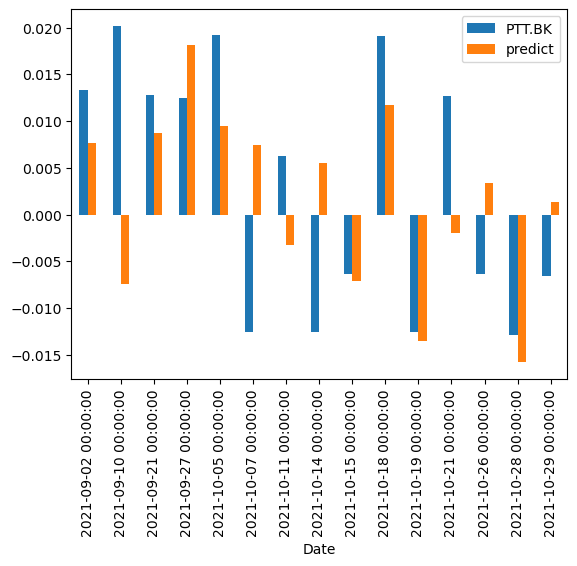

In [87]:
compare.plot(kind='bar')

In [88]:
from sklearn.tree import export_graphviz
import pydot

tree = rf.estimators_[0]
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_test.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

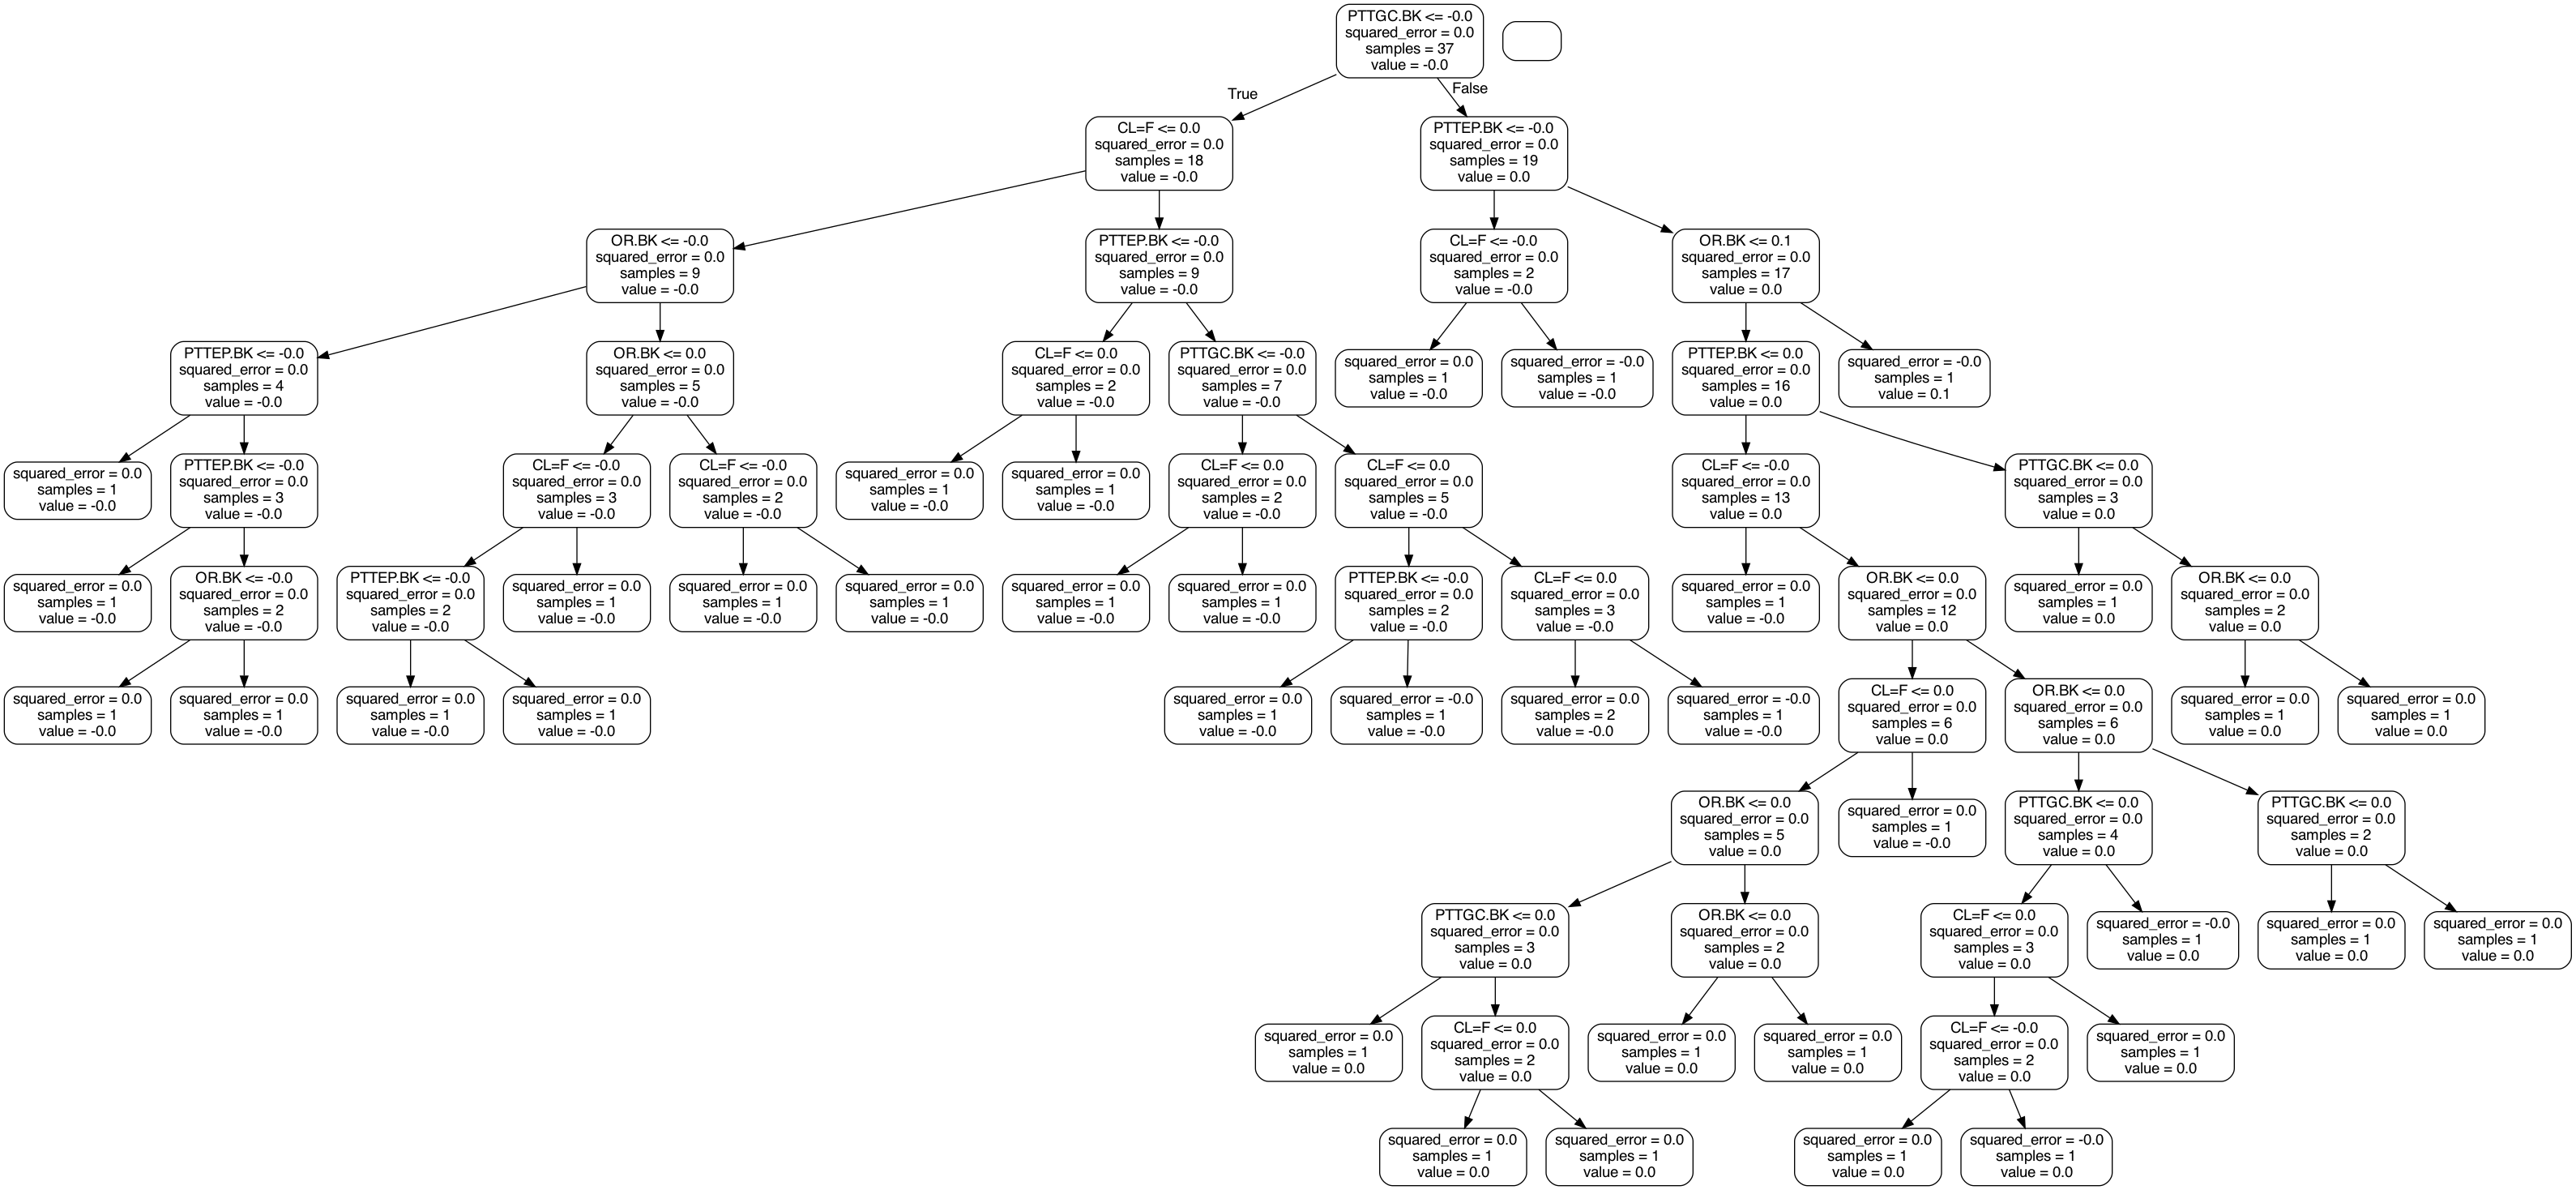

In [89]:
from IPython.display import Image
Image(filename = 'tree.png')

In [90]:
from sklearn.metrics import mean_squared_error
def rf(X_train,y_train,X_test,y_test,
      n_estimators=100,criterion='squared_error',max_depth=3):
    rf = RandomForestRegressor(n_estimators = n_estimators,
                              criterion=criterion,
                              max_depth=max_depth)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    return mse

In [91]:
rf(X_train,y_train,X_test,y_test)

0.0001305157258083056

In [92]:
def grid_rf(X_train,y_train,X_test,y_test,
           n_estimator_choice,criterion_choice,depth):
    results_list = []
    for i in n_estimator_choice:
        for j in criterion_choice:
            for k in depth:
                results = rf(X_train,y_train,X_test,y_test,n_estimators=i,criterion=j,max_depth=k)
                results_list.append(results)
    return results_list

In [93]:
n_estimator_values =[100,200]
depth_values = [3,4,5]
criterion_value = ['squared_error']
grid_rf(X_train,y_train,X_test,y_test,n_estimator_choice=n_estimator_values,
        criterion_choice=criterion_value,depth=depth_values)

[0.000132805137227617,
 0.00013830898342309853,
 0.00015155645109743326,
 0.00013351972794770366,
 0.00013939804289121822,
 0.00014987598540149683]

In [94]:
def grid_rf(X_train,y_train,X_test,y_test,
           n_estimator_choice,criterion_choice,depth):
    results_list = []
    for i in n_estimator_choice:
        for j in criterion_choice:
            for k in depth:
                results = rf(X_train,y_train,X_test,y_test,n_estimators=i,criterion=j,max_depth=k)
                results_list.append([i,j,k,results])
    return results_list

In [95]:
n_estimator_values =[100,200,500]
depth_values = [2,3,4]
criterion_values = ['squared_error','absolute_error']
grid_rf(X_train,y_train,X_test,y_test,n_estimator_choice=n_estimator_values,
        criterion_choice=criterion_values,depth=depth_values)

[[100, 'squared_error', 2, 0.00013492513541810524],
 [100, 'squared_error', 3, 0.00012526310337990874],
 [100, 'squared_error', 4, 0.00013502337081471453],
 [100, 'absolute_error', 2, 0.00012817766212532792],
 [100, 'absolute_error', 3, 0.00013782040184330194],
 [100, 'absolute_error', 4, 0.00012575412362603405],
 [200, 'squared_error', 2, 0.00013834638840180482],
 [200, 'squared_error', 3, 0.00014066886482202767],
 [200, 'squared_error', 4, 0.00013695449829822858],
 [200, 'absolute_error', 2, 0.0001286195766687129],
 [200, 'absolute_error', 3, 0.00013030517897136517],
 [200, 'absolute_error', 4, 0.00014069110553006074],
 [500, 'squared_error', 2, 0.0001375195378976653],
 [500, 'squared_error', 3, 0.00013331582824352217],
 [500, 'squared_error', 4, 0.00013888513363444625],
 [500, 'absolute_error', 2, 0.00013175984333261797],
 [500, 'absolute_error', 3, 0.0001303723753473252],
 [500, 'absolute_error', 4, 0.00013286184786889978]]

In [96]:
test = pd.DataFrame(grid_rf(X_train,y_train,X_test,y_test,n_estimator_choice=n_estimator_values,
        criterion_choice=criterion_value,depth=depth_values))

In [97]:
test

,0,1,2,3
0,100,squared_error,2,0.000134
1,100,squared_error,3,0.000129
2,100,squared_error,4,0.000145
3,200,squared_error,2,0.000146
4,200,squared_error,3,0.000139
5,200,squared_error,4,0.000132
6,500,squared_error,2,0.000140
7,500,squared_error,3,0.000137
8,500,squared_error,4,0.000135


In [98]:
test.columns = ['n_estimators','method','depth','mse']
test

,n_estimators,method,depth,mse
0,100,squared_error,2,0.000134
1,100,squared_error,3,0.000129
2,100,squared_error,4,0.000145
3,200,squared_error,2,0.000146
4,200,squared_error,3,0.000139
5,200,squared_error,4,0.000132
6,500,squared_error,2,0.000140
7,500,squared_error,3,0.000137
8,500,squared_error,4,0.000135


In [99]:
test[test.mse ==test.mse.min()]

,n_estimators,method,depth,mse
1,100,squared_error,3,0.000129


<AxesSubplot:xlabel='Date'>

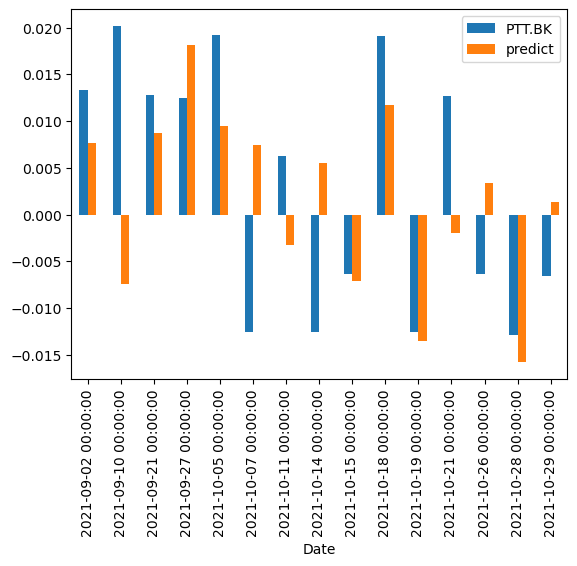

In [100]:
compare.plot(kind='bar')

# find side accuracy 

<AxesSubplot:xlabel='Date'>

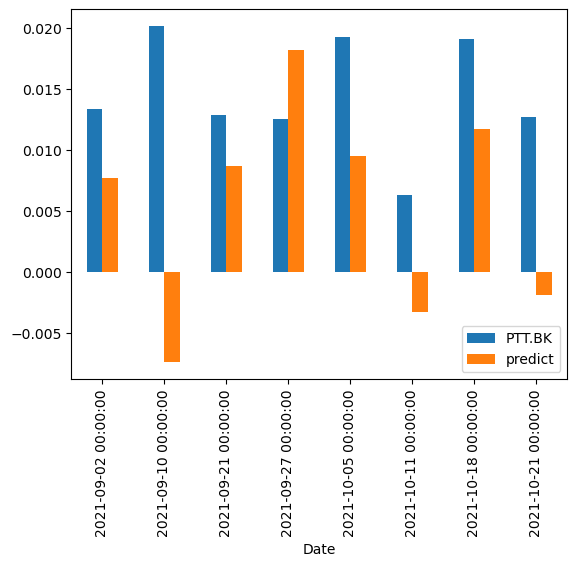

In [101]:
compare[compare['PTT.BK']>0].plot(kind='bar')

<AxesSubplot:xlabel='Date'>

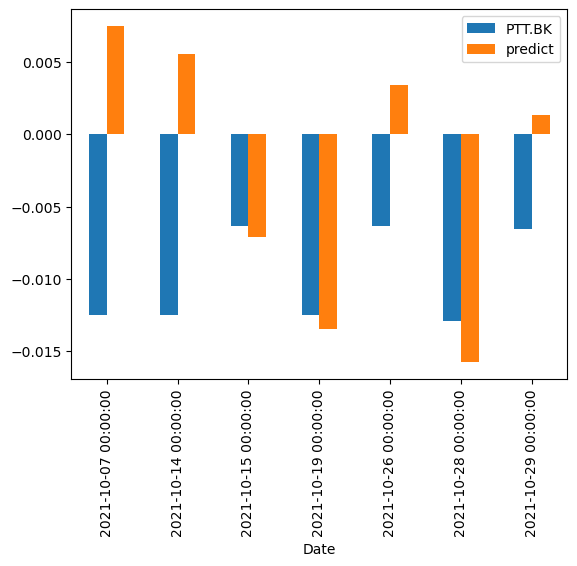

In [102]:
compare[compare['PTT.BK']<0].plot(kind='bar')

# the buy side is accuracy more than sell side

In [103]:
compare

,PTT.BK,predict
Date,,
2021-09-02,0.013333,0.007668
2021-09-10,0.020134,-0.007414
2021-09-21,0.012821,0.008713
2021-09-27,0.012500,0.018161
2021-10-05,0.019231,0.009488
2021-10-07,-0.012500,0.007483
2021-10-11,0.006289,-0.003281
2021-10-14,-0.012500,0.005533
2021-10-15,-0.006329,-0.007132


In [104]:
compare.product(axis =1)
# for find accuracy

Date
2021-09-02    0.000102
2021-09-10   -0.000149
2021-09-21    0.000112
2021-09-27    0.000227
2021-10-05    0.000182
2021-10-07   -0.000094
2021-10-11   -0.000021
2021-10-14   -0.000069
2021-10-15    0.000045
2021-10-18    0.000224
2021-10-19    0.000168
2021-10-21   -0.000024
2021-10-26   -0.000022
2021-10-28    0.000204
2021-10-29   -0.000009
dtype: float64

In [105]:
(compare.product(1)>0).sum()

8

In [106]:
# add return y_predict
def rf(X_train,y_train,X_test,y_test,
      n_estimators=100,criterion='gini',max_depth=3):
    rf = RandomForestRegressor(n_estimators = n_estimators,
                              criterion=criterion,
                              max_depth=max_depth)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    return mse,y_pred

In [114]:
def grid_rf(X_train,y_train,X_test,y_test,
           n_estimator_choice,criterion_choice,depth):
    results_list = []
    for i in n_estimator_choice:
        for j in criterion_choice:
            for k in depth:
                results,y_pred = rf(X_train,y_train,X_test,y_test,n_estimators=i,criterion=j,max_depth=k)
                compare =    pd.DataFrame(y_test)
                compare['predict'] = y_pred
                
                direction = (compare.product(1)>0).sum()
                
                results_list.append([i,j,k,results,direction])
    return results_list

In [120]:
n_estimator_values =[100,200,500]
depth_values = [3,4,5]
criterion_values = ['squared_error','absolute_error']
grid_rf(X_train,y_train,X_test,y_test,n_estimator_choice=n_estimator_values,
        criterion_choice=criterion_values,depth=depth_values)

[[100, 'squared_error', 3, 0.00015232104460623447, 8],
 [100, 'squared_error', 4, 0.0001405557613964556, 8],
 [100, 'squared_error', 5, 0.0001483780541169274, 8],
 [100, 'absolute_error', 3, 0.00013301695349123463, 8],
 [100, 'absolute_error', 4, 0.00012632167243709414, 8],
 [100, 'absolute_error', 5, 0.00014459204673746405, 8],
 [200, 'squared_error', 3, 0.00014232792205782623, 8],
 [200, 'squared_error', 4, 0.00013617949797623295, 8],
 [200, 'squared_error', 5, 0.00014114297171279172, 8],
 [200, 'absolute_error', 3, 0.0001305972870952269, 8],
 [200, 'absolute_error', 4, 0.00013296823317635297, 8],
 [200, 'absolute_error', 5, 0.0001421111115051458, 8],
 [500, 'squared_error', 3, 0.00013709487656720978, 8],
 [500, 'squared_error', 4, 0.00014192699218683064, 8],
 [500, 'squared_error', 5, 0.00014708946281441013, 8],
 [500, 'absolute_error', 3, 0.00012649120194922807, 8],
 [500, 'absolute_error', 4, 0.0001379432401579827, 8],
 [500, 'absolute_error', 5, 0.00013999848208454908, 8]]

In [121]:
grid_df_rf = pd.DataFrame(grid_rf(X_train,y_train,X_test,y_test,n_estimator_choice=n_estimator_values,
        criterion_choice=criterion_values,depth=depth_values))

In [122]:
grid_df_rf

,0,1,2,3,4
0,100,squared_error,3,0.000138,8
1,100,squared_error,4,0.000131,8
2,100,squared_error,5,0.000153,8
3,100,absolute_error,3,0.000129,8
4,100,absolute_error,4,0.000140,8
5,100,absolute_error,5,0.000123,9
6,200,squared_error,3,0.000139,8
7,200,squared_error,4,0.000132,8
8,200,squared_error,5,0.000140,8
9,200,absolute_error,3,0.000132,9


In [123]:
grid_df_rf.columns = ['n_estimators','method','depth','mse','accuracy']
grid_df_rf

,n_estimators,method,depth,mse,accuracy
0,100,squared_error,3,0.000138,8
1,100,squared_error,4,0.000131,8
2,100,squared_error,5,0.000153,8
3,100,absolute_error,3,0.000129,8
4,100,absolute_error,4,0.000140,8
5,100,absolute_error,5,0.000123,9
6,200,squared_error,3,0.000139,8
7,200,squared_error,4,0.000132,8
8,200,squared_error,5,0.000140,8
9,200,absolute_error,3,0.000132,9


In [124]:
grid_df_rf.sort_values(['accuracy','mse'],ascending=[False,True])

,n_estimators,method,depth,mse,accuracy
5,100,absolute_error,5,0.000123,9
15,500,absolute_error,3,0.000129,9
9,200,absolute_error,3,0.000132,9
10,200,absolute_error,4,0.000126,8
3,100,absolute_error,3,0.000129,8
1,100,squared_error,4,0.000131,8
7,200,squared_error,4,0.000132,8
16,500,absolute_error,4,0.000134,8
12,500,squared_error,3,0.000137,8
0,100,squared_error,3,0.000138,8


In [125]:
# best rf accuracy prediction
grid_df_rf.sort_values(['accuracy','mse'],ascending=[False,True]).iloc[0]

n_estimators               100
method          absolute_error
depth                        5
mse                   0.000123
accuracy                     9
Name: 5, dtype: object